In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


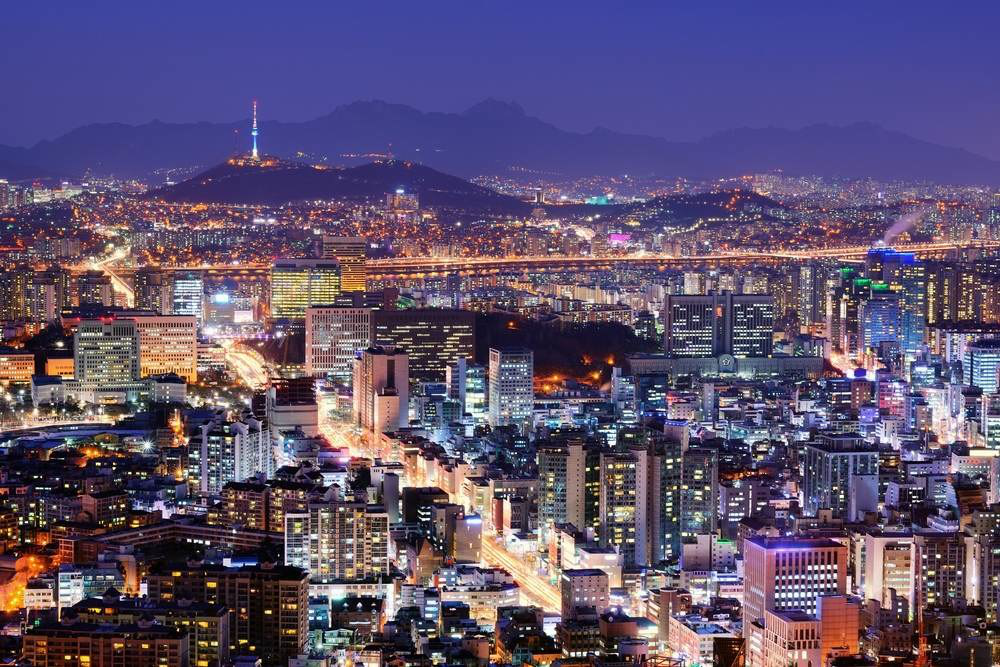

In [17]:
Image(filename='test.png') 

# About this Dataset

## Context

This dataset deals with air pollution measurement information in Seoul, South Korea. Seoul Metropolitan Government provides many public data, including air pollution information, through the 'Open Data Plaza' I made a structured dataset by collecting and adjusting various air pollution related datasets provided by the Seoul Metropolitan Government

Content

This data provides average values for six pollutants (SO2, NO2, CO, O3, PM10, PM2.5). - Data were measured every hour between 2017 and 2019. - Data were measured for 25 districts in Seoul.

Descripion of factors avialable in Data

SO2 - Sulfur dioxide is a gas. It is invisible and has a nasty, sharp smell. It reacts easily with other substances to form harmful compounds, such as sulfuric acid, sulfurous acid and sulfate particles.

About 99% of the sulfur dioxide in air comes from human sources. The main source of sulfur dioxide in the air is industrial activity that processes materials that contain sulfur, eg the generation of electricity from coal, oil or gas that contains sulfur. Some mineral ores also contain sulfur, and sulfur dioxide is released when they are processed. In addition, industrial activities that burn fossil fuels containing sulfur can be important sources of sulfur dioxide.

Sulfur dioxide is also present in motor vehicle emissions, as the result of fuel combustion. In the past, motor vehicle exhaust was an important, but not the main, source of sulfur dioxide in air. However, this is no longer the case.

NO2 - Nitrogen dioxide is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air contributes to the formation and modification of other air pollutants, such as ozone and particulate matter, and to acid rain.

CO - CO is a colorless, odorless gas that can be harmful when inhaled in large amounts. CO is released when something is burned. The greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels. A variety of items in your home such as unvented kerosene and gas space heaters, leaking chimneys and furnaces, and gas stoves also release CO and can affect air quality indoors.

O3 - Ozone (O3) is a gas that can form and react under the action of light and that is present in two layers of the atmosphere. High up in the atmosphere, ozone forms a layer that shields the Earth from ultraviolet rays. However, at ground level, ozone is considered a major air pollutant.

PM10 & PM2.5 - PM stands for Particulate Matter. PM2.5 and PM10 are minute particles present in the air and exposure to it is very harmful for health. When the level of these particles increases and penetrate deeply in to the lungs, you can experience number of health impacts like breathing problem, burning or sensation in the eyes etc.

In [21]:
data_air= pd.read_csv('Measurement_summary.csv')

In [22]:
data_air.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


# Data cleaning

In [23]:
data_air.isnull()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
647506,False,False,False,False,False,False,False,False,False,False,False
647507,False,False,False,False,False,False,False,False,False,False,False
647508,False,False,False,False,False,False,False,False,False,False,False
647509,False,False,False,False,False,False,False,False,False,False,False


In [24]:
%matplotlib inline

In [25]:
data_measure=pd.read_csv('Measurement_item_info.csv')

###  Standard value of all of the factors

In [26]:
data_measure 

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


### checking weather data has any missing value or not

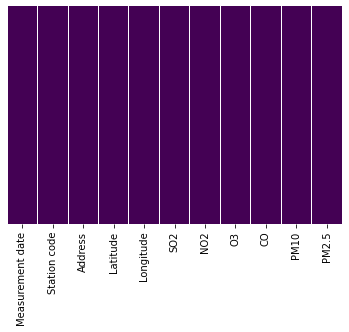

In [27]:

sns.heatmap(data_air.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Now we can conclude there is no any missing value in data given as there is plane bar for all factors








In [29]:
data_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [31]:
req_data=data_air[['SO2','NO2','O3','CO','PM10','PM2.5']]

In [32]:
req_data.describe()

,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


conclusion from description of data-

SO2 has mean count '-0.001795' which is much lesser than Good satandard.

NO2 has mean count '0.022519' which is also lesser than Good satandard of NO2.

O3 has mean count '0.017979' which is also lesser than Good satandard of O3.

CO has mean count '0.017979' which is also lesser than Good satandard of CO.

PM10 has mean count '43.708051' it will come under Normal standard of PM10.

PM2.5 has mean count '25.411995' it will also come under Normal standard of PM2.5.

so overall Seoul has good air Quality

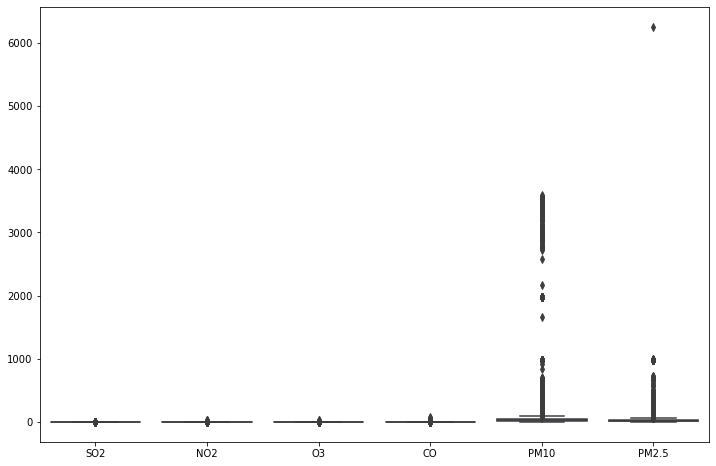

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=req_data)


In [36]:
#converting 'SO2' value in their standard
def measure(x):
    if x<=0.02:
        return 'good'
    elif 0.02<x<=0.05:
        return 'normal'
    elif 0.05<x<=0.15:
        return 'bad'
    else:
        return 'very bad'
    
SO2_measure=list(map(measure,req_data['SO2']))
# converting 'NO2' value in their standard
def measure(x):
    if x<=0.03:
        return 'good'
    elif 0.03<x<=0.06:
        return 'normal'
    elif 0.06<x<=0.20:
        return 'bad'
    else:
        return 'very bad'
    
NO2_measure=list(map(measure,req_data['NO2']))
# converting 'O3' value in their standard
def measure(x):
    if x<=0.02:
        return 'good'
    elif 0.02<x<=0.05:
        return 'normal'
    elif 0.05<x<=0.15:
        return 'bad'
    else:
        return 'very bad'
    
O3_measure=list(map(measure,req_data['O3']))
# converting 'CO' value in their standard
def measure(x):
    if x<=2.00:
        return 'good'
    elif 2.00<x<=9.00:
        return 'normal'
    elif 9.00<x<=15.00:
        return 'bad'
    else:
        return 'very bad'
    
CO_measure=list(map(measure,req_data['CO']))
# converting 'PM10' value in their standard
def measure(x):
    if x<=30.00:
        return 'good'
    elif 30.00<x<=80.00:
        return 'normal'
    elif 80.00<x<=150.00:
        return 'bad'
    else:
        return 'very bad'
    
PM10_measure=list(map(measure,req_data['PM10']))
# converting 'PM2.5' value in their standard
def measure(x):
    if x<=15.00:
        return 'good'
    elif 15.00<x<=35.00:
        return 'normal'
    elif 35.00<x<=75.00:
        return 'bad'
    else:
        return 'very bad'
    


In [37]:
PM25_measure=list(map(measure,req_data['PM2.5']))
req_data['SO2_standard']=SO2_measure
req_data['NO2_standard']=NO2_measure
req_data['O3_standard']=O3_measure
req_data['CO_standard']=CO_measure
req_data['PM10_standard']=PM10_measure
req_data['PM2.5_standard']=PM25_measure

<ipython-input-37-567f3f686fe2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['SO2_standard']=SO2_measure
<ipython-input-37-567f3f686fe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['NO2_standard']=NO2_measure
<ipython-input-37-567f3f686fe2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [38]:
req_data

,SO2,NO2,O3,CO,PM10,PM2.5,SO2_standard,NO2_standard,O3_standard,CO_standard,PM10_standard,PM2.5_standard
0,0.004,0.059,0.002,1.2,73.0,57.0,good,normal,good,good,normal,bad
1,0.004,0.058,0.002,1.2,71.0,59.0,good,normal,good,good,normal,bad
2,0.004,0.056,0.002,1.2,70.0,59.0,good,normal,good,good,normal,bad
3,0.004,0.056,0.002,1.2,70.0,58.0,good,normal,good,good,normal,bad
4,0.003,0.051,0.002,1.2,69.0,61.0,good,normal,good,good,normal,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
647506,0.003,0.028,0.013,0.5,23.0,17.0,good,good,good,good,good,normal
647507,0.003,0.025,0.015,0.4,25.0,19.0,good,good,good,good,good,normal
647508,0.003,0.023,0.015,0.4,24.0,17.0,good,good,good,good,good,normal
647509,0.003,0.040,0.004,0.5,25.0,18.0,good,normal,good,good,good,normal


These above data is of description of no of observation recorded from different Stations

## Analysis on the quality standard of of all the factors.

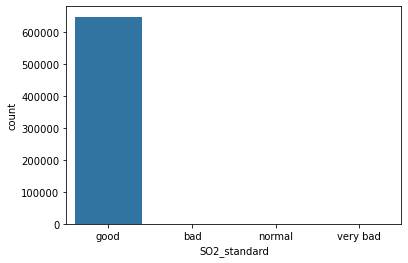

In [39]:
sns.countplot(x='SO2_standard',data=req_data)

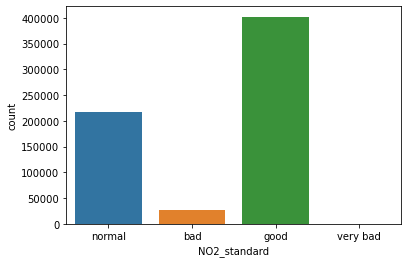

In [40]:
sns.countplot(x='NO2_standard',data=req_data)

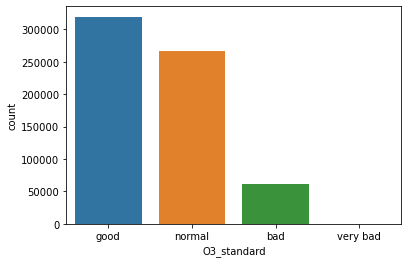

In [41]:
sns.countplot(x='O3_standard',data=req_data)

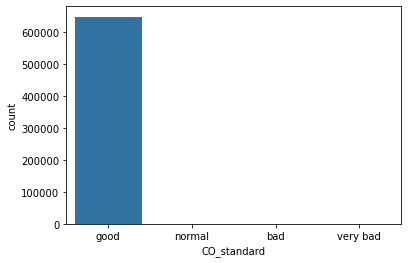

In [42]:
sns.countplot(x='CO_standard',data=req_data)

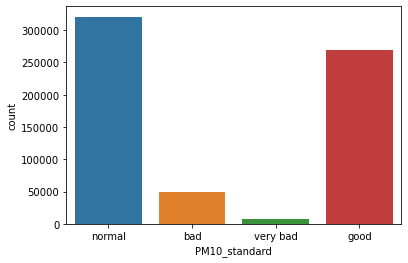

In [43]:
sns.countplot(x='PM10_standard',data=req_data)

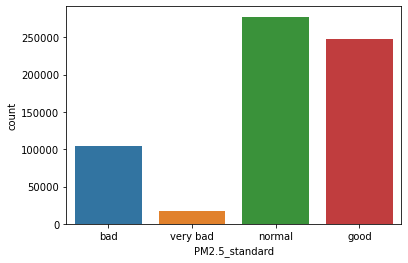

In [44]:
sns.countplot(x='PM2.5_standard',data=req_data)

From above figures we can see that SO2 and CO level is quite good as all the data observed to be of 'good' standard.
O3 has much lesser quality than these two factors as some data are observed of 'normal' and 'bad' standard
and PM10 and PM2.5 has to be notice as there is very_bad standard of these factors observed.



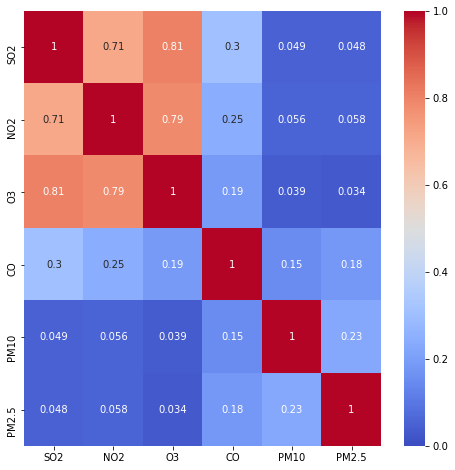

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(req_data.corr(),
            vmin=0,
            cmap='coolwarm',
            annot=True);

At here from the above picture we can see that there is high correlation in between 'SO2 and O3' and lowest correlation is in between'O3 and PM 2.5'

In [46]:
req_data['Address']=data_air["Address"]

In [47]:
req_data

,SO2,NO2,O3,CO,PM10,PM2.5,SO2_standard,NO2_standard,O3_standard,CO_standard,PM10_standard,PM2.5_standard,Address
0,0.004,0.059,0.002,1.2,73.0,57.0,good,normal,good,good,normal,bad,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ..."
1,0.004,0.058,0.002,1.2,71.0,59.0,good,normal,good,good,normal,bad,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ..."
2,0.004,0.056,0.002,1.2,70.0,59.0,good,normal,good,good,normal,bad,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ..."
3,0.004,0.056,0.002,1.2,70.0,58.0,good,normal,good,good,normal,bad,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ..."
4,0.003,0.051,0.002,1.2,69.0,61.0,good,normal,good,good,normal,bad,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647506,0.003,0.028,0.013,0.5,23.0,17.0,good,good,good,good,good,normal,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul..."
647507,0.003,0.025,0.015,0.4,25.0,19.0,good,good,good,good,good,normal,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul..."
647508,0.003,0.023,0.015,0.4,24.0,17.0,good,good,good,good,good,normal,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul..."
647509,0.003,0.040,0.004,0.5,25.0,18.0,good,normal,good,good,good,normal,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul..."


# Analysis on different Address of Seoul

### As 'PM10' and PM'2.5' are affecting more on air quality so we will try to see how these factors are affecting each city of Seoul

In [49]:
data_address=data_air["Address"].value_counts()
data_address

369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea             25906
71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea        25906
236, Baekjegobun-ro, Songpa-gu, Seoul, Republic of Korea             25905
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea          25905
15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea                25905
17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea            25905
70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea          25905
19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea            25905
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea                25905
14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea              25905
426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea                25904
43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea    25904
136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea              25904
56, Jungang-ro 52-gil, Ya

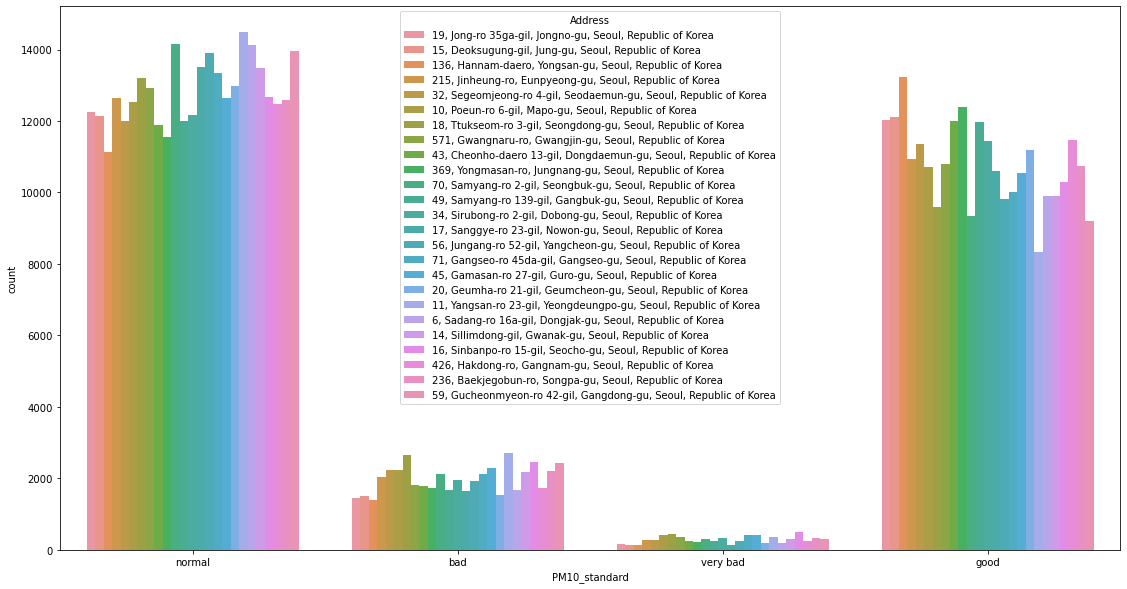

In [50]:
plt.figure(figsize=(19,10))

sns.countplot(x="PM10_standard",data=req_data,hue="Address",orient="v")


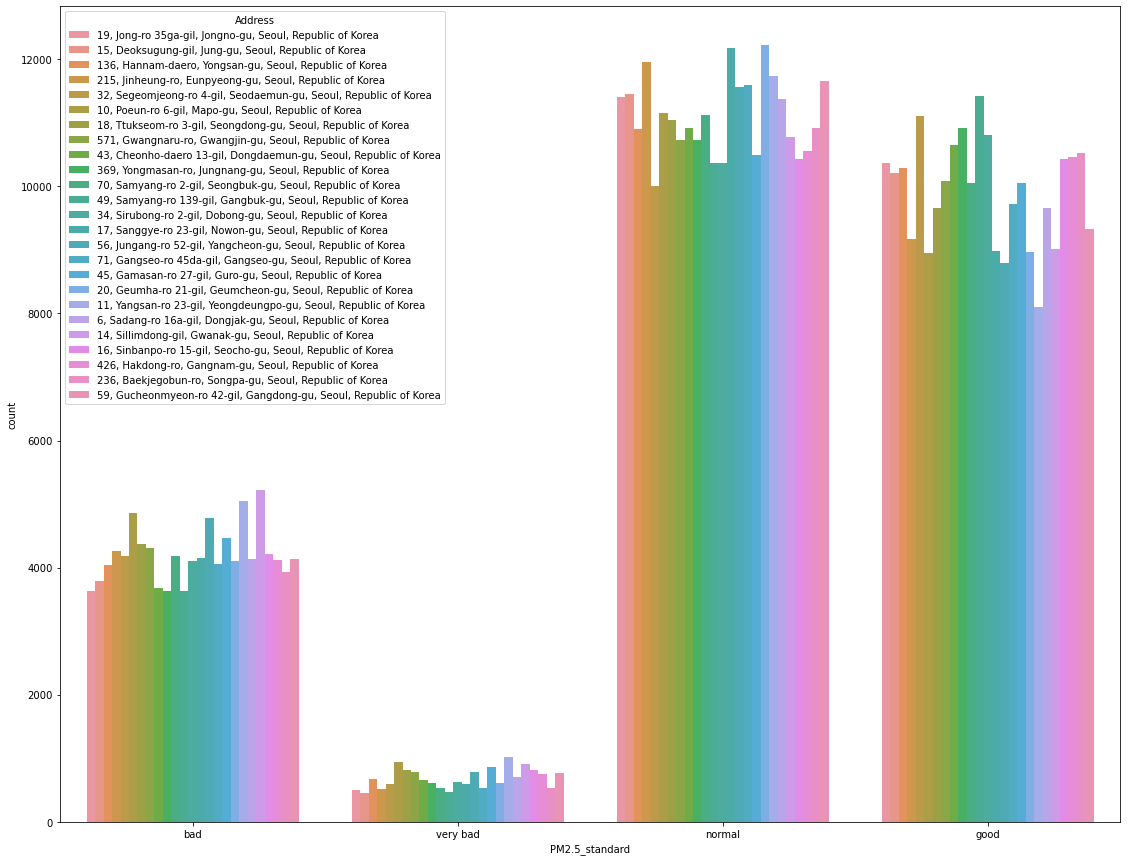

In [51]:
plt.figure(figsize=(19,15))

sns.countplot(x="PM2.5_standard",data=req_data,hue="Address",orient="v")